# Visualization of applying filter

In [2]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

In [3]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from tqdm import tqdm
import matplotlib.pyplot as plt

from src.custom_filters import *

In [4]:
def convolve(image, filter, title='', return_val=False):
    """
    This function performs convolution and returns both the original and convolved images.
		"""

    #  defining filter size
    filter_size = filter.shape[0]

    #  creating an array to store convolutions (x-m+1, y-n+1)
    convolved = np.zeros(((image.shape[0] - filter_size) + 1, 
                      (image.shape[1] - filter_size) + 1))
    
    #  performing convolution
    for i in tqdm(range(image.shape[0])):
      for j in range(image.shape[1]):
        try:
          convolved[i,j] = (image[i:(i+filter_size),
                                  j:(j+filter_size)] * filter).sum()
        except Exception:
          pass

    #  converting to tensor
    convolved = torch.tensor(convolved)
    #  applying relu activation
    convolved = F.relu(convolved)

    #  producing plots
    figure, axes = plt.subplots(1,2, dpi=120)
    plt.suptitle(title)
    axes[0].imshow(image, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title('original')
    axes[1].imshow(convolved, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title('convolved')
    
    if return_val:
      return convolved

## Below are examples of applying filters on an image.

### Binary Dataset (Pulsars and Non-Pulsars)

['n_10', 'labels', 'n_20', 'n_30', 'n_40', 'n_50', 'n_60']


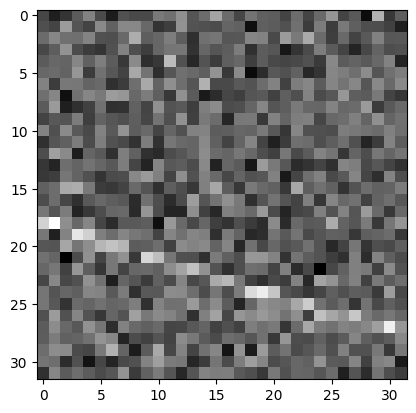

In [20]:
dataset = np.load("../data/32x32_ml_ppa_data_binary.npz")
data = dataset[dataset.files[3]]
labels = dataset["labels"]
print(dataset.files)

indices = np.where(labels == 0)[0]
test_image = data[indices[0]][0]

plt.imshow(test_image, cmap="gray")
plt.show()

100%|██████████| 32/32 [00:00<00:00, 5647.71it/s]


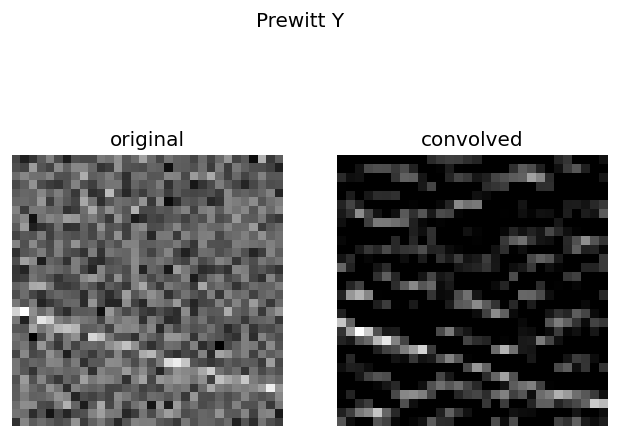

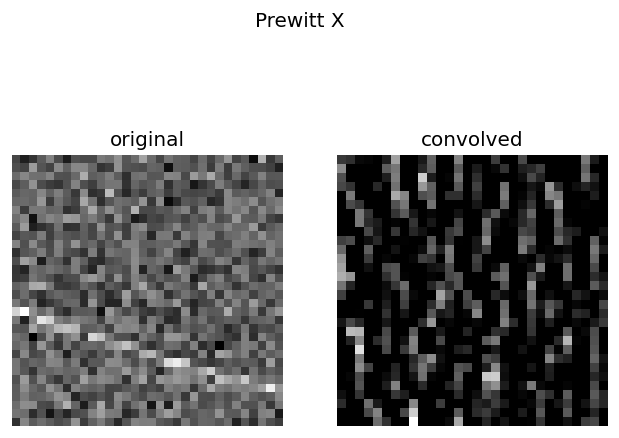

In [21]:
prewitt_y = prewitt_filter("y")
convolve(test_image, prewitt_y, title="Prewitt Y")

prewitt_x = prewitt_filter("x")
convolve(test_image, prewitt_x, title="Prewitt X")

100%|██████████| 32/32 [00:00<00:00, 7220.28it/s]


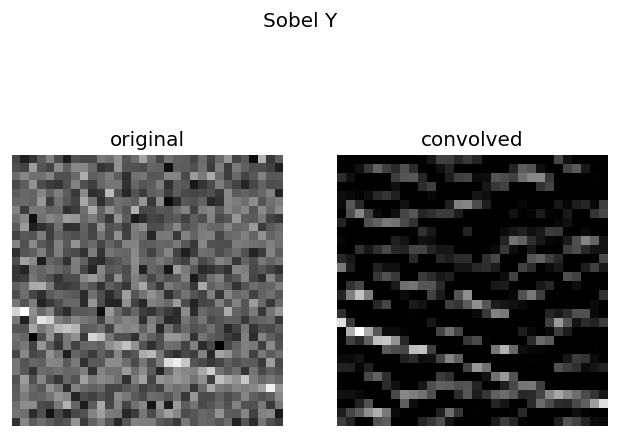

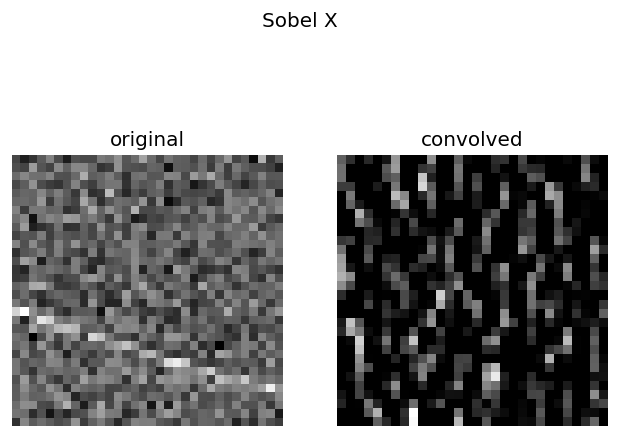

In [22]:
sobel_y = sobel_filter("y")
convolve(test_image, sobel_y, title="Sobel Y")

sobel_x = sobel_filter("x")
convolve(test_image, sobel_x, title="Sobel X")

100%|██████████| 32/32 [00:00<00:00, 6831.11it/s]


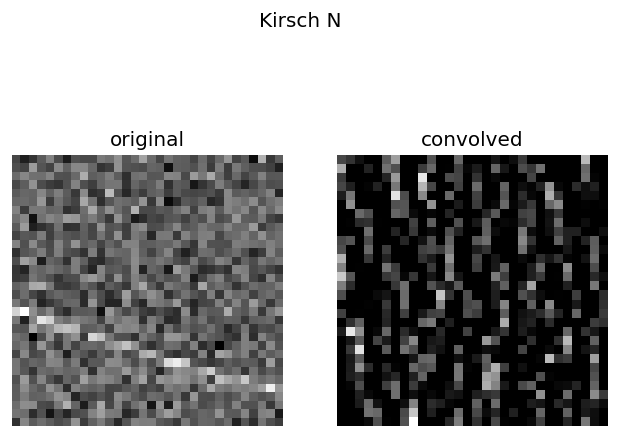

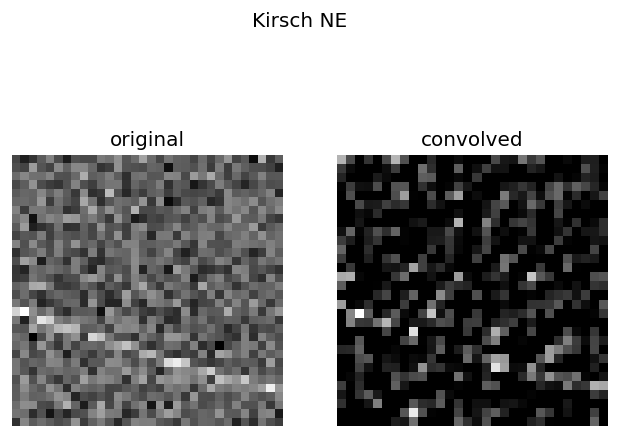

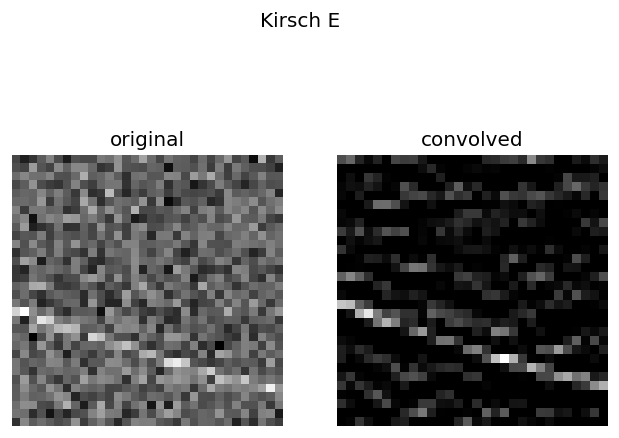

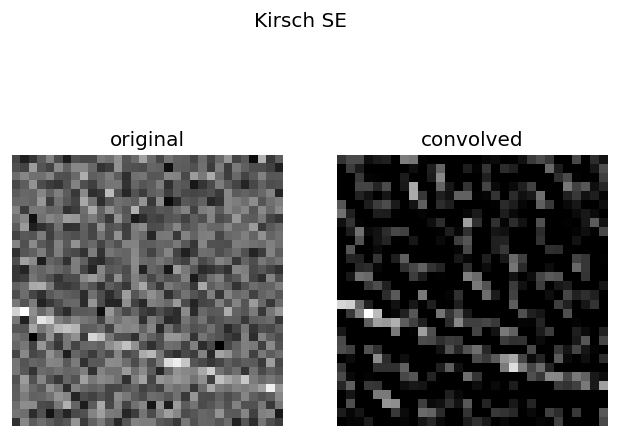

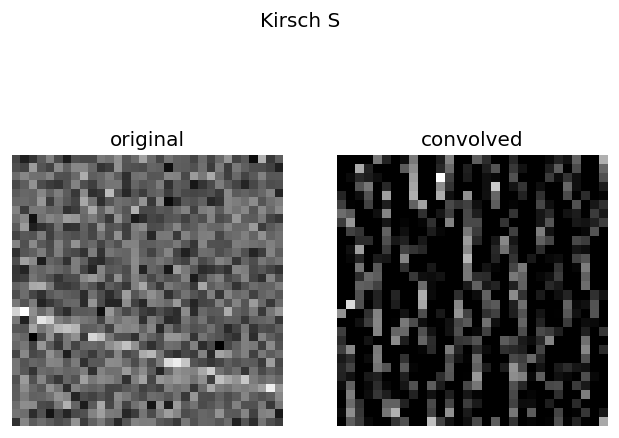

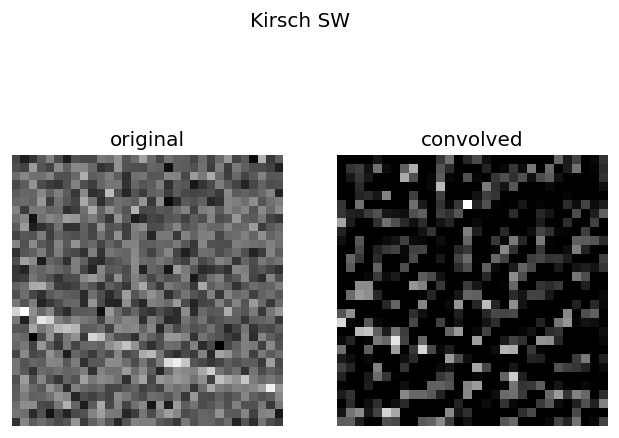

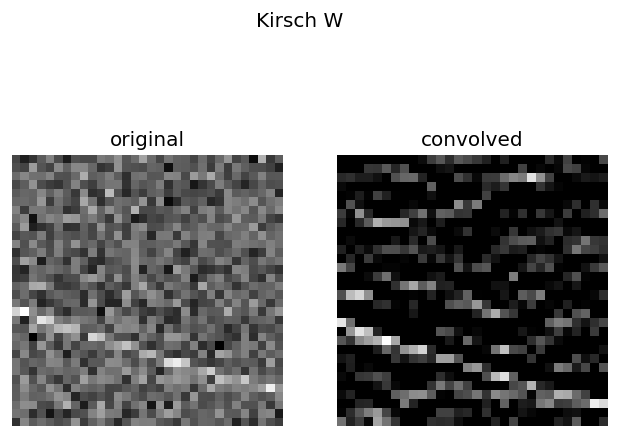

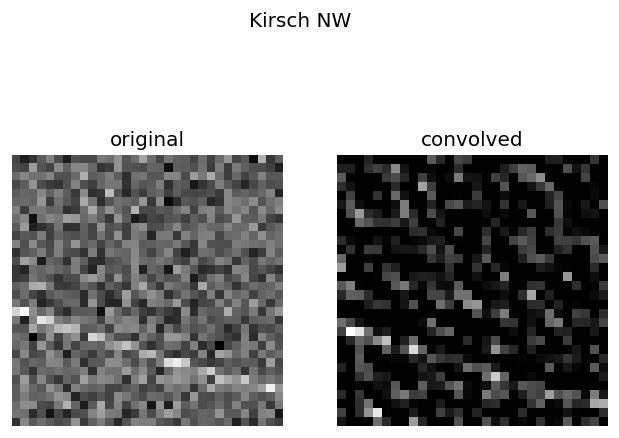

In [23]:
kirsch_n = kirsch_filter("N")
convolve(test_image, kirsch_n, title="Kirsch N")

kirsch_ne = kirsch_filter("NE")
convolve(test_image, kirsch_ne, title="Kirsch NE")

kirsch_e = kirsch_filter("E")
convolve(test_image, kirsch_e, title="Kirsch E")

kirsch_se = kirsch_filter("SE")
convolve(test_image, kirsch_se, title="Kirsch SE")

kirsch_s = kirsch_filter("S")
convolve(test_image, kirsch_s, title="Kirsch S")

kirsch_sw = kirsch_filter("SW")
convolve(test_image, kirsch_sw, title="Kirsch SW")

kirsch_w = kirsch_filter("W")
convolve(test_image, kirsch_w, title="Kirsch W")

kirsch_nw = kirsch_filter("NW")
convolve(test_image, kirsch_nw, title="Kirsch NW")

### Multi Dataset (Pulsar, Non-Pulsar, BBRFI, NBRFI)

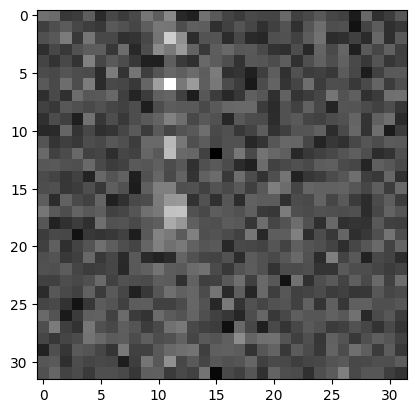

In [6]:
dataset = np.load("../data/32x32_ml_ppa_data_multi.npz")
data = dataset["data"]
labels = dataset["labels"]

indices = np.where(labels == 2)[0]
idx = np.random.choice(len(indices))
test_image = data[indices[idx]][0]

plt.imshow(test_image, cmap="gray")
plt.show()

100%|██████████| 32/32 [00:00<00:00, 6126.71it/s]


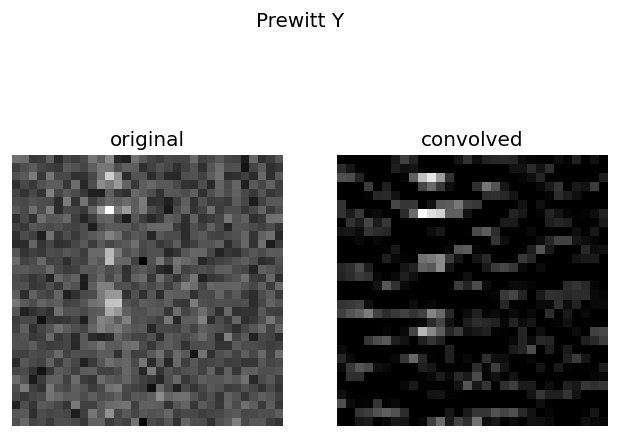

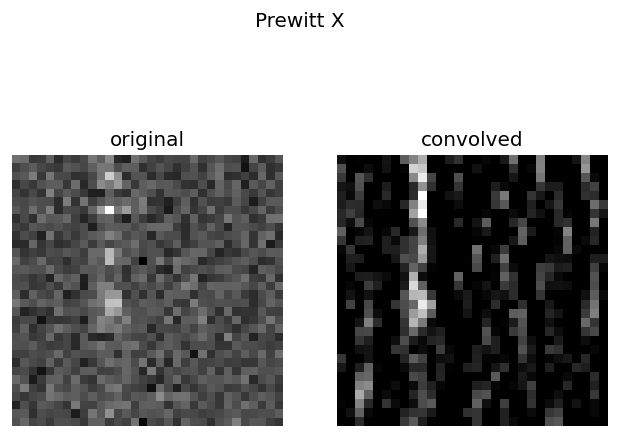

In [7]:
prewitt_y = prewitt_filter("y")
convolve(test_image, prewitt_y, title="Prewitt Y")

prewitt_x = prewitt_filter("x")
convolve(test_image, prewitt_x, title="Prewitt X")

100%|██████████| 32/32 [00:00<00:00, 4028.87it/s]


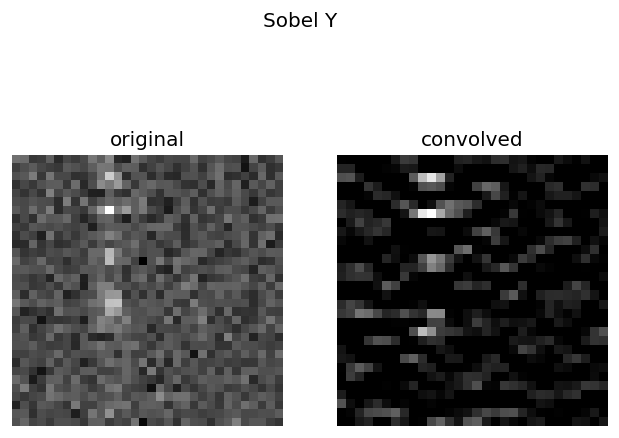

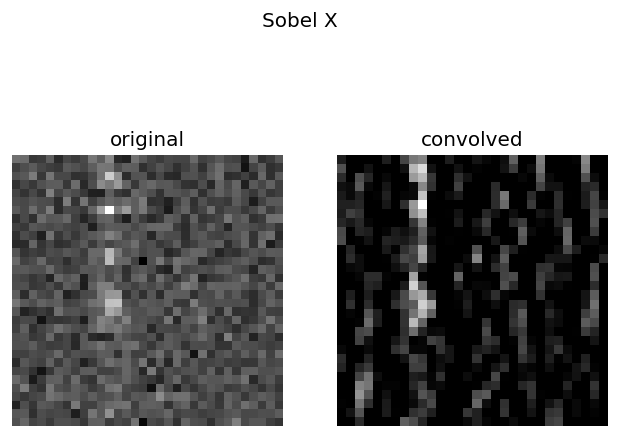

In [8]:
sobel_y = sobel_filter("y")
convolve(test_image, sobel_y, title="Sobel Y")

sobel_x = sobel_filter("x")
convolve(test_image, sobel_x, title="Sobel X")

In [ ]:
kirsch_n = kirsch_filter("N")
convolve(test_image, kirsch_n, title="Kirsch N")

kirsch_ne = kirsch_filter("NE")
convolve(test_image, kirsch_ne, title="Kirsch NE")

kirsch_e = kirsch_filter("E")
convolve(test_image, kirsch_e, title="Kirsch E")

kirsch_se = kirsch_filter("SE")
convolve(test_image, kirsch_se, title="Kirsch SE")

kirsch_s = kirsch_filter("S")
convolve(test_image, kirsch_s, title="Kirsch S")

kirsch_sw = kirsch_filter("SW")
convolve(test_image, kirsch_sw, title="Kirsch SW")

kirsch_w = kirsch_filter("W")
convolve(test_image, kirsch_w, title="Kirsch W")

kirsch_nw = kirsch_filter("NW")
convolve(test_image, kirsch_nw, title="Kirsch NW")

## Below are representations of feature maps created by CNNs

In [364]:
class TestNet(nn.Module):
    """
    This model is used to tune the network architecture.
    """

    def __init__(self, filters=None):
        super(TestNet, self).__init__()
        if filters is not None:
            self.conv1 = nn.Conv2d(1, len(filters), kernel_size=3, padding=1)
            self.conv1.weight = nn.Parameter(filters)

        else:
            self.conv1 = nn.Conv2d(1, 4, kernel_size=3, padding=1) 
    
    def forward(self, x):
        x = self.conv1(x)
        
        return x

First when using custom filters.

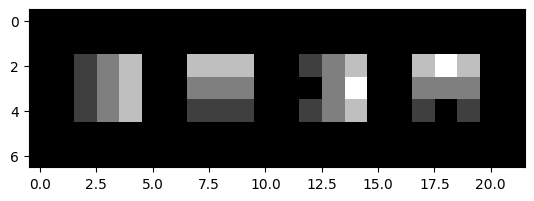

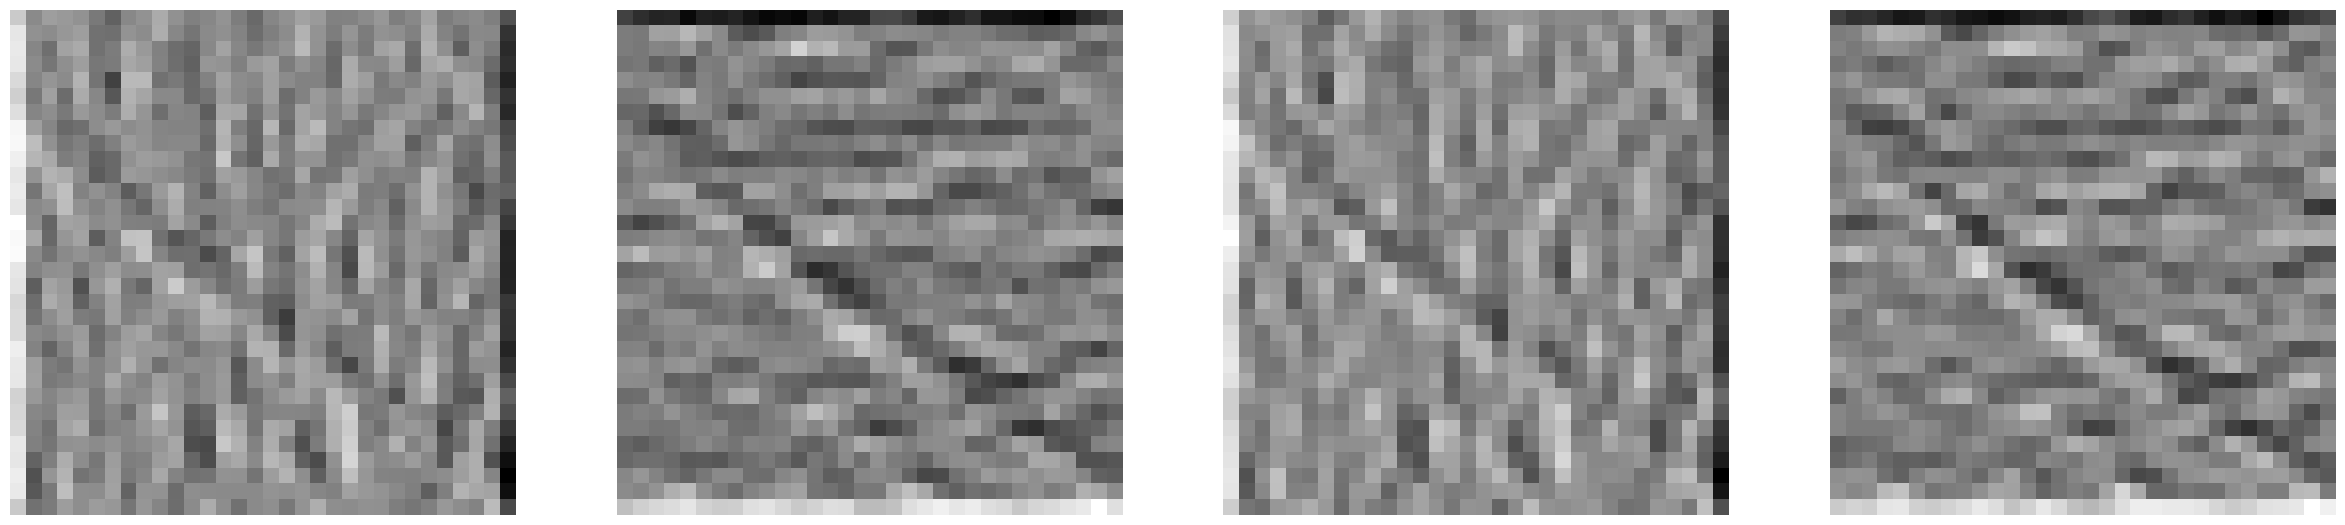

In [365]:
filters_1 = np.array([[prewitt_x], [prewitt_y], [sobel_x], [sobel_y]], dtype=np.float32)

input_image = torch.from_numpy(data[0].astype(np.float32))
model = TestNet(torch.from_numpy(filters_1))
output = model(input_image)

## print kernels ##
kernels = model.conv1.weight.detach().clone()
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
filter_img = torchvision.utils.make_grid(kernels, nrow = 12)
plt.imshow(filter_img.permute(1, 2, 0).cpu())
plt.show()

## print feature maps ##
feature_maps = []
for feature_map in output:
    feature_maps.append(feature_map.detach().numpy())

fig = plt.figure(figsize=(30, 50))
for i in range(len(feature_maps)):
    ax = fig.add_subplot(5, 4, i + 1)
    ax.imshow(feature_maps[i], cmap="gray")
    ax.axis("off")
plt.show()

Then when using randomly initialized filters.

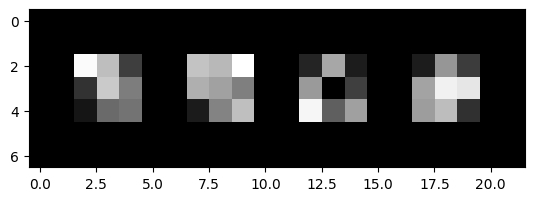

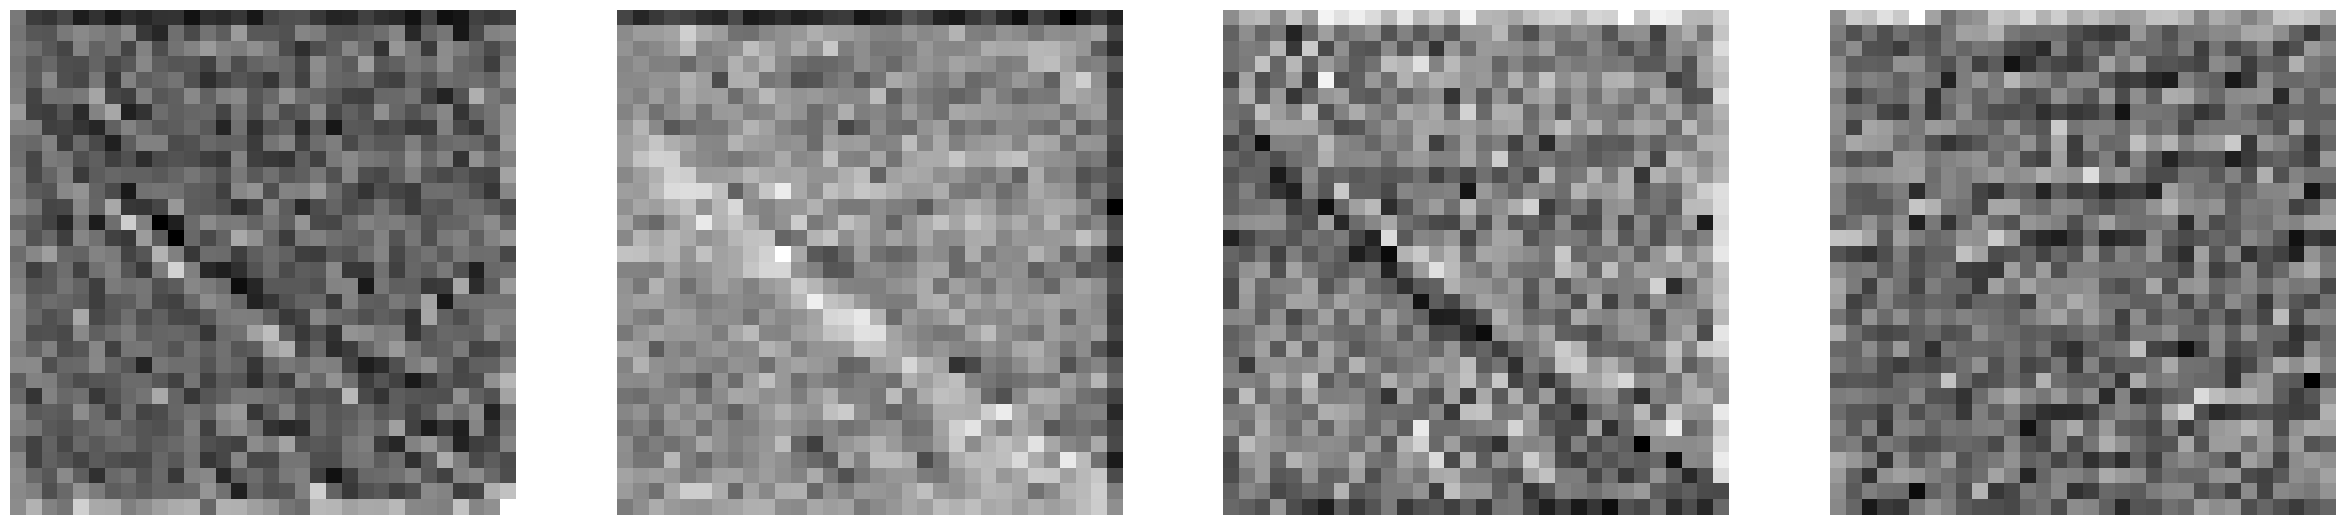

In [366]:
model = TestNet()
output = model(input_image)

### print kernels ##
import torchvision
kernels = model.conv1.weight.detach().clone()
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
filter_img = torchvision.utils.make_grid(kernels, nrow = 12)
plt.imshow(filter_img.permute(1, 2, 0).cpu())
plt.show()

## print feature maps ##
feature_maps = []
for feature_map in output:
    feature_maps.append(feature_map.detach().numpy())

fig = plt.figure(figsize=(30, 50))
for i in range(len(feature_maps)):
    ax = fig.add_subplot(5, 4, i + 1)
    ax.imshow(feature_maps[i], cmap="gray")
    ax.axis("off")
plt.show()

## Below is an exmaple of applying the Canny Algorithm

In [5]:
def get_gaussian_kernel(k=3, mu=0, sigma=1, normalize=True):
    # compute 1 dimension gaussian
    gaussian_1D = np.linspace(-1, 1, k)
    # compute a grid distance from center
    x, y = np.meshgrid(gaussian_1D, gaussian_1D)
    distance = (x ** 2 + y ** 2) ** 0.5

    # compute the 2 dimension gaussian
    gaussian_2D = np.exp(-(distance - mu) ** 2 / (2 * sigma ** 2))
    gaussian_2D = gaussian_2D / (2 * np.pi *sigma **2)

    # normalize part (mathematically)
    if normalize:
        gaussian_2D = gaussian_2D / np.sum(gaussian_2D)
        
    return gaussian_2D

['data', 'labels']


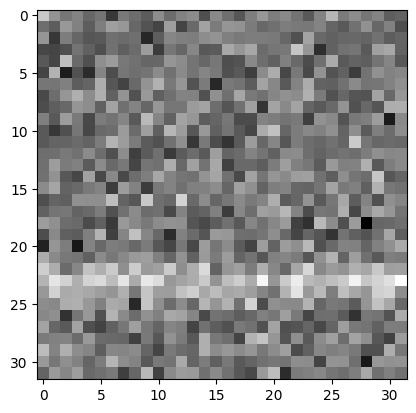

In [6]:
dataset = np.load("../data/32x32_ml_ppa_data_multi.npz")
data = dataset["data"]
labels = dataset["labels"]
print(dataset.files)

indices = np.where(labels == 3)[0]
test_image = data[indices[0]][0]

plt.imshow(test_image, cmap="gray")
plt.show()

100%|██████████| 30/30 [00:00<00:00, 329.23it/s]


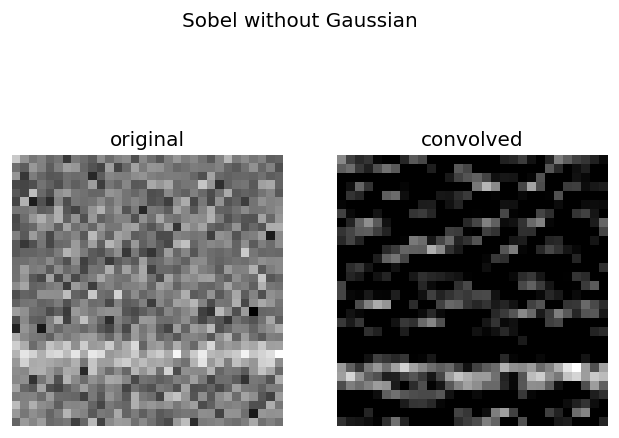

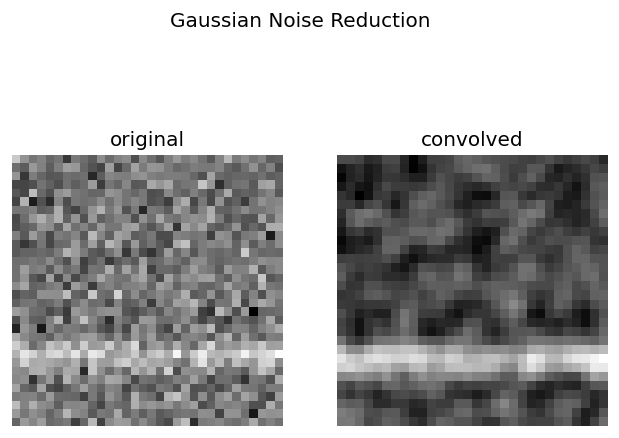

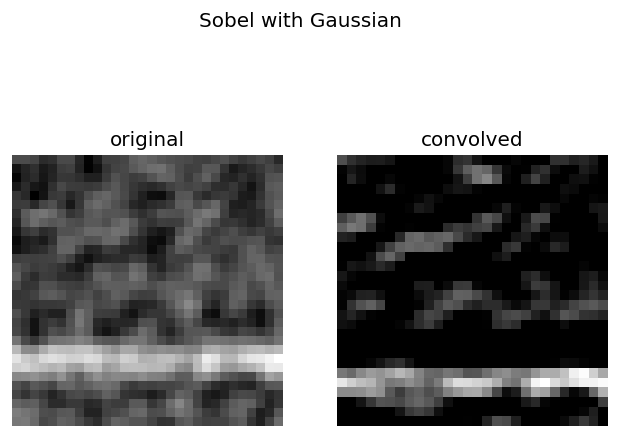

In [8]:
sobel_y = sobel_filter("y")
convolve(test_image, sobel_y, title="Sobel without Gaussian")

filter = get_gaussian_kernel()
new_img = convolve(test_image, filter, title="Gaussian Noise Reduction", return_val=True)
convolve(new_img, sobel_y, title="Sobel with Gaussian")